In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objs as go
import plotly.offline as py
import ast
# To display plots in Jupyter Notebook
py.init_notebook_mode(connected=True)

from geopy.geocoders import Nominatim


In [2]:
df=pd.read_csv("zomato.csv")

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# EXPLORATORY DATA ANALYSIS

In [5]:
print("dataset contains {} rows and {} columns".format(df.shape[0],df.shape[1]))

dataset contains 51717 rows and 17 columns


In [6]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
df['rate'] = df['rate'].replace('NEW', None)
df['rate'] = df['rate'].str.replace('/5', '').str.strip()
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

In [8]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '')
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')


In [9]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Top Restaurants in Bangaluru

Text(0.5, 0, 'Number of outlets')

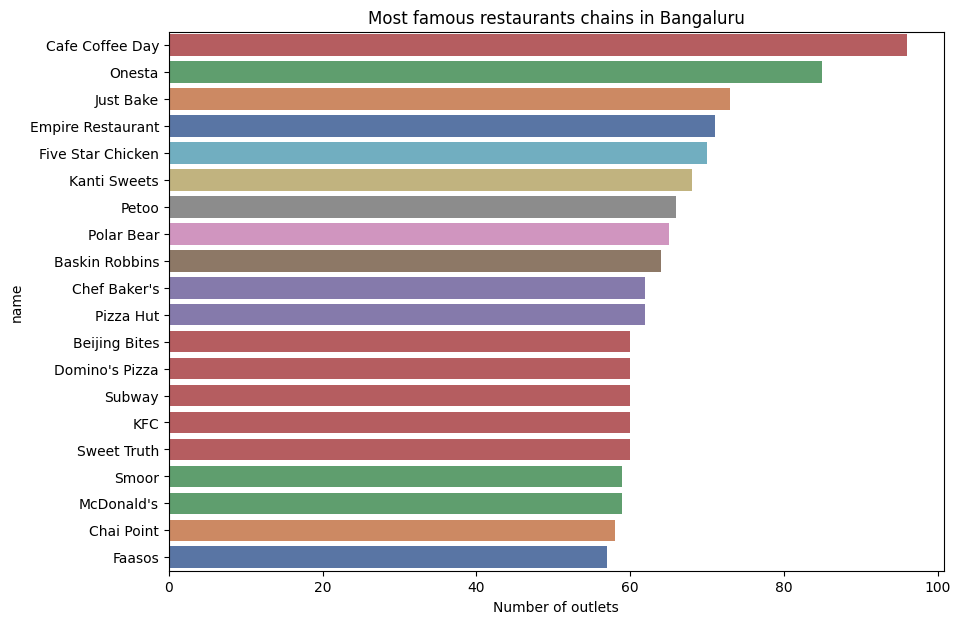

In [10]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep',hue=chains,legend=False)
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")

# How many of the restuarants do not accept online orders?

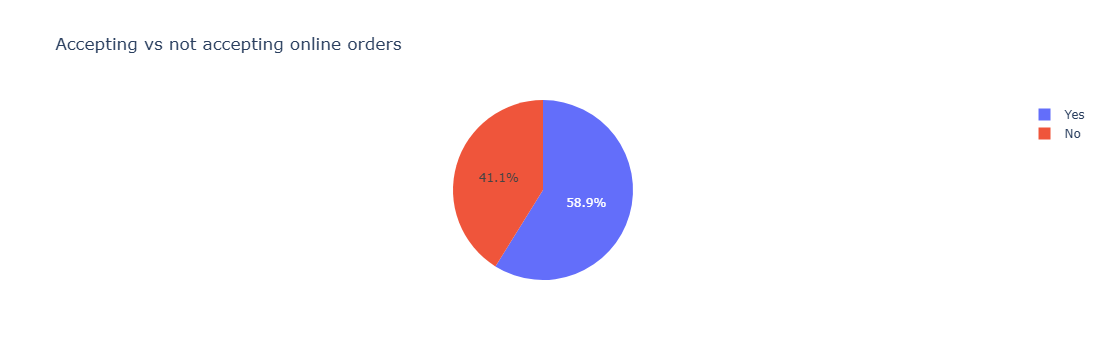

In [11]:


# Count values and reset index
ooa_df = df['online_order'].value_counts().reset_index()

# Rename columns
ooa_df.columns = ['online_order', 'count']

# Create pie chart
fig = px.pie(
    ooa_df,
    names='online_order',   # labels
    values='count',         # sizes
    title='Accepting vs not accepting online orders '
)
fig.show()


# Top Restaurent Accepting Online Orders

In [12]:
accepting_count=df[df['online_order']=='Yes']
k=accepting_count['name'].value_counts()[0:15]


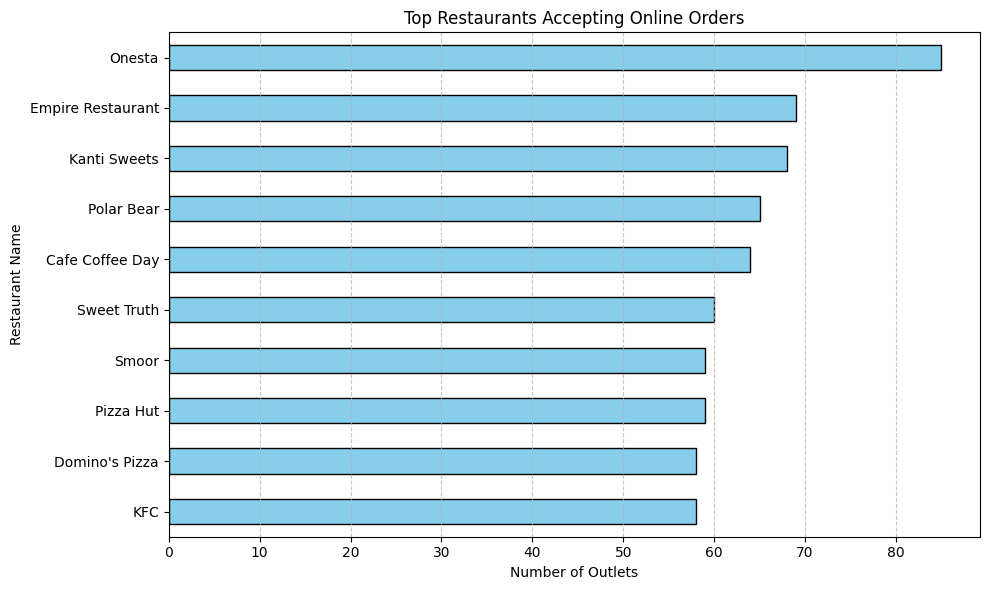

In [13]:
import matplotlib.pyplot as plt

# Filter only the rows where online_order is 'Yes'
online_yes_df = df[df['online_order'] == 'Yes']

# Count the number of restaurants with 'Yes' in online_order, grouped by restaurant name
k = online_yes_df["name"].value_counts().head(10)  # Top 10 most frequent

# Plot horizontally
plt.figure(figsize=(10, 6))
k.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Top Restaurants Accepting Online Orders")
plt.xlabel("Number of Outlets")
plt.ylabel("Restaurant Name")
plt.gca().invert_yaxis()  # Highest on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# What is the ratio b/w restaurants that provide and do not provide table booking ?

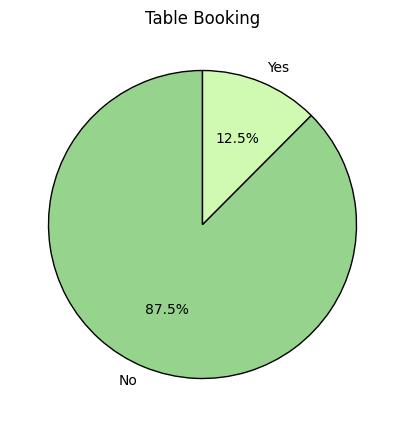

In [14]:
import matplotlib.pyplot as plt

# Count values
x = df['book_table'].value_counts()

# Colors
colors = ['#96D38C', '#D0F9B1']

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    x.values,
    labels=x.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Table Booking')
plt.show()


# Top Restaurants Accepting Table Booking

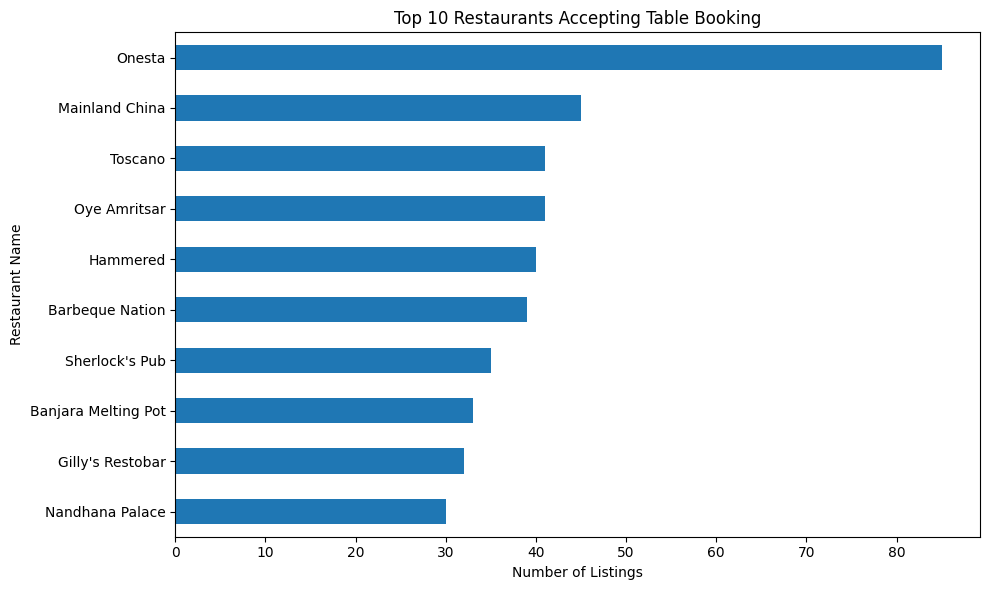

In [15]:
 # Filter only the rows where book_table is 'Yes'
online_yess_df = df[df['book_table'] == 'Yes']

# Count occurrences of each restaurant name
k = online_yess_df["name"].value_counts().head(10)  # Top 10 for better readability

# Plotting
plt.figure(figsize=(10,6))
k.plot(kind='barh')  # Horizontal bar plot
plt.xlabel("Number of Listings")
plt.ylabel("Restaurant Name")
plt.title("Top 10 Restaurants Accepting Table Booking")
plt.gca().invert_yaxis()  # To show the highest value on top
plt.tight_layout()
plt.show()

# Rating Restuarant Distribution

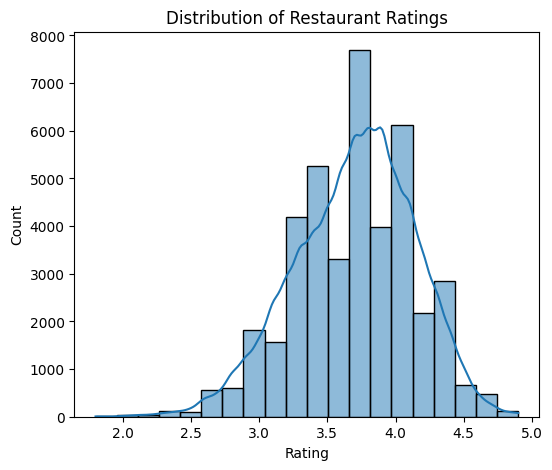

In [16]:
rating = df['rate'].dropna()
plt.figure(figsize=(6, 5))
sns.histplot(rating, bins=20, kde=True)  # better than distplot (deprecated)
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Cost vs Rating

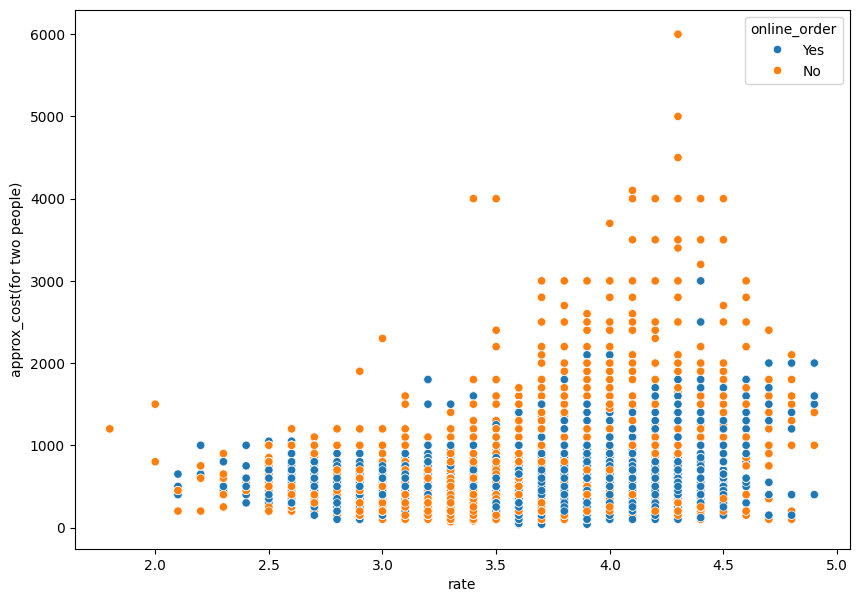

In [17]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=df)
plt.show()

# Distribution of cost for two people

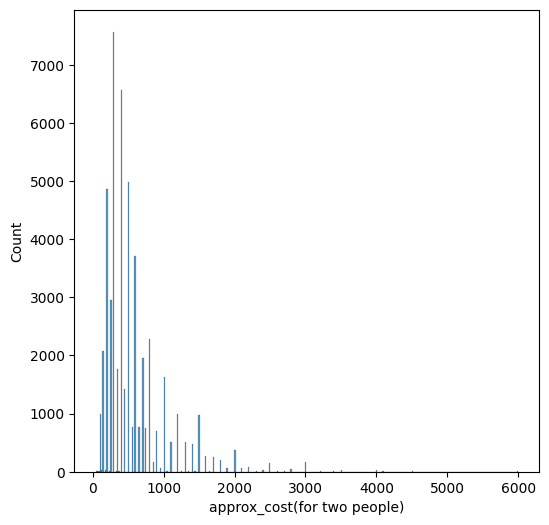

In [18]:
plt.figure(figsize=(6,6))
sns.histplot(df['approx_cost(for two people)'])
plt.show()

# Which are the most common restaurant type in Banglore?

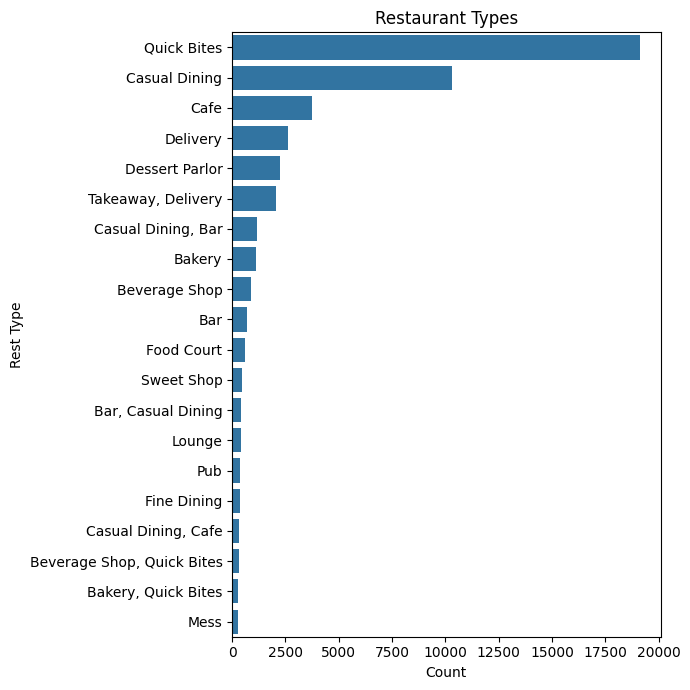

In [19]:
plt.figure(figsize=(7,7))
rest = df['rest_type'].value_counts()[:20]

sns.barplot(x=rest.values, y=rest.index)
plt.title("Restaurant Types")
plt.xlabel("Count")
plt.ylabel("Rest Type")
plt.tight_layout()
plt.show()


# most number of restaurants

C:\Users\pulib\AppData\Local\Temp\ipykernel_28064\3304204775.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='count', ylabel='location'>

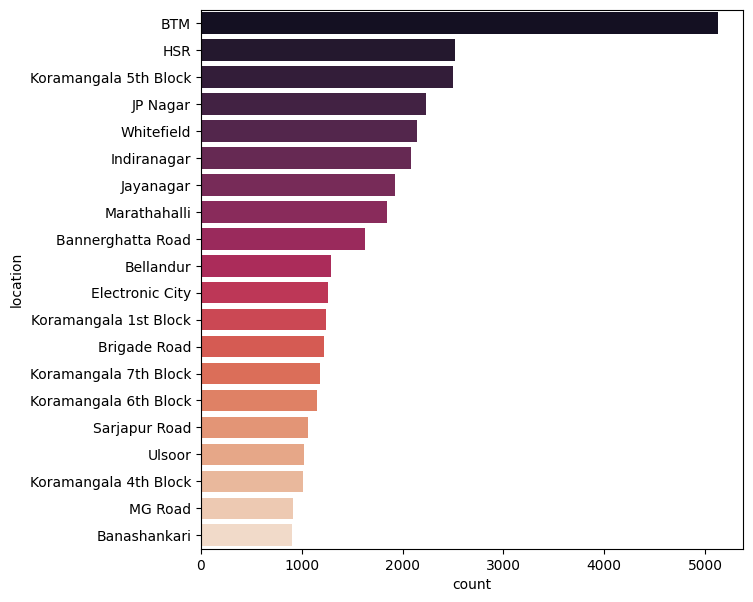

In [20]:
plt.figure(figsize=(7,7))
Rest_locations=df['location'].value_counts()[:20]
sns.barplot(x=Rest_locations,y=Rest_locations.index,palette="rocket")

# Extracting location information using Geopy

In [23]:
# Create DataFrame of unique locations
locations = pd.DataFrame({"Name": df['location'].unique()})

# Add 'Bangalore' before each location name for better geocoding
locations['Name'] = locations['Name'].apply(lambda x: "Bangalore " + str(x))

# Setup geocoder and list for lat-lon
from geopy.geocoders import Nominatim
import numpy as np

lat_lon = []
geolocator = Nominatim(user_agent="app")

# Loop through each location and geocode it
for loc in locations['Name']:
    location = geolocator.geocode(loc)
    if location is None:
        lat_lon.append(np.nan)
    else:
        geo = (location.latitude, location.longitude)
        lat_lon.append(geo)

# Add coordinates to the DataFrame
locations['geo_loc'] = lat_lon

# Remove 'Bangalore' from names for clean display
locations["Name"] = locations['Name'].apply(lambda x: x.replace("Bangalore", "")[1:])

# Save to CSV
locations.to_csv('locations.csv', index=False)

# Print to confirm
print(locations.head())


                 Name                   geo_loc
0        Banashankari   (12.9278196, 77.556621)
1        Basavanagudi  (12.9417261, 77.5755021)
2         Mysore Road  (12.9181936, 77.4908919)
3           Jayanagar  (12.9292731, 77.5824229)
4  Kumaraswamy Layout  (12.9067683, 77.5595021)


In [24]:
#make sure no null,and locaton is in list,tuple(obj)
locations = locations.dropna()
locations.to_csv("locations.csv", index=False)


# Location of Restaurant

In [25]:
import folium

# Create map centered at the first location
m = folium.Map(location=locations["geo_loc"][0], zoom_start=12)

# Add markers
for name, coords in zip(locations["Name"], locations["geo_loc"]):
    folium.Marker(location=coords, popup=name).add_to(m)

# Save map
m


# Heatmap of restaurant count on each location


In [26]:
location_counts = df["location"].value_counts().reset_index()
location_counts.columns = ["Name", "count"]
location_counts

,Name,count
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144
...,...,...
88,Yelahanka,6
89,West Bangalore,6
90,Jakkur,3
91,Rajarajeshwari Nagar,2


In [26]:
Rest_locations = Rest_locations.dropna()

In [28]:
# Count restaurants per location from the main df
location_counts = df["location"].value_counts().reset_index()
location_counts.columns = ["Name", "count"]

# Merge only where Name matches in both DataFrames
Rest_locations = location_counts.merge(locations, on="Name", how="inner")

# Now geo_loc will have no NaNs
Rest_locations["lat"] = Rest_locations["geo_loc"].apply(lambda x: x[0])
Rest_locations["lon"] = Rest_locations["geo_loc"].apply(lambda x: x[1])
Rest_locations.head()

,Name,count,geo_loc,lat,lon
0,BTM,5124,"(12.9112759, 77.6045654)",12.911276,77.604565
1,HSR,2523,"(12.9116225, 77.6388622)",12.911623,77.638862
2,Koramangala 5th Block,2504,"(12.9348429, 77.6189768)",12.934843,77.618977
3,JP Nagar,2235,"(12.9096941, 77.5866067)",12.909694,77.586607
4,Whitefield,2144,"(12.9963995, 77.7614229)",12.996400,77.761423


# Which are the most popular cuisines of Bangalore?

Text(0.5, 1.0, 'Most popular cuisines of Bangalore')

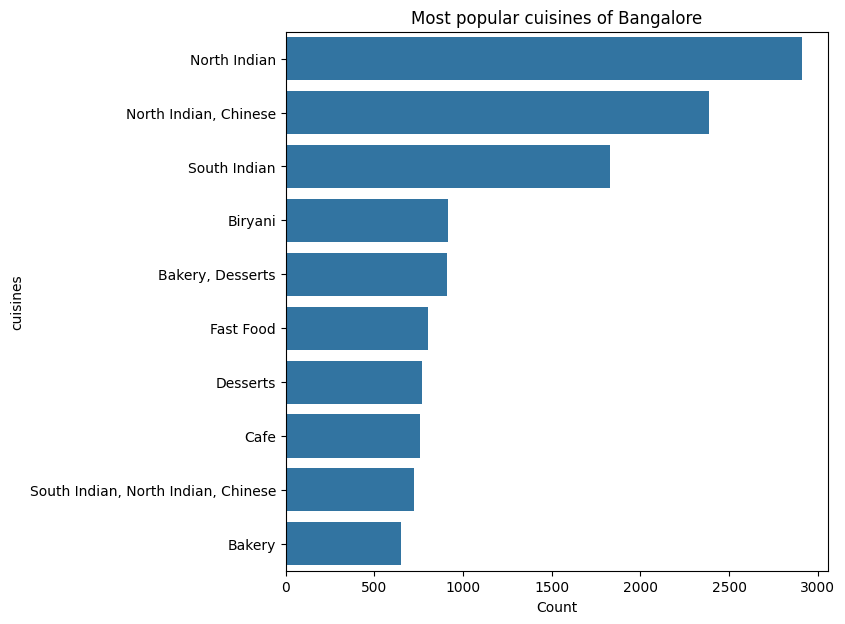

In [29]:
plt.figure(figsize=(7,7))
cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(x=cuisines,y=cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")

In [ ]:
We can observe that North Indian,chinese,South Indian and Biriyani are most common.
Is this imply the fact that Banglore is more influenced by North Indian culture more than South

# Which are the most popular casual dining restaurant chains?

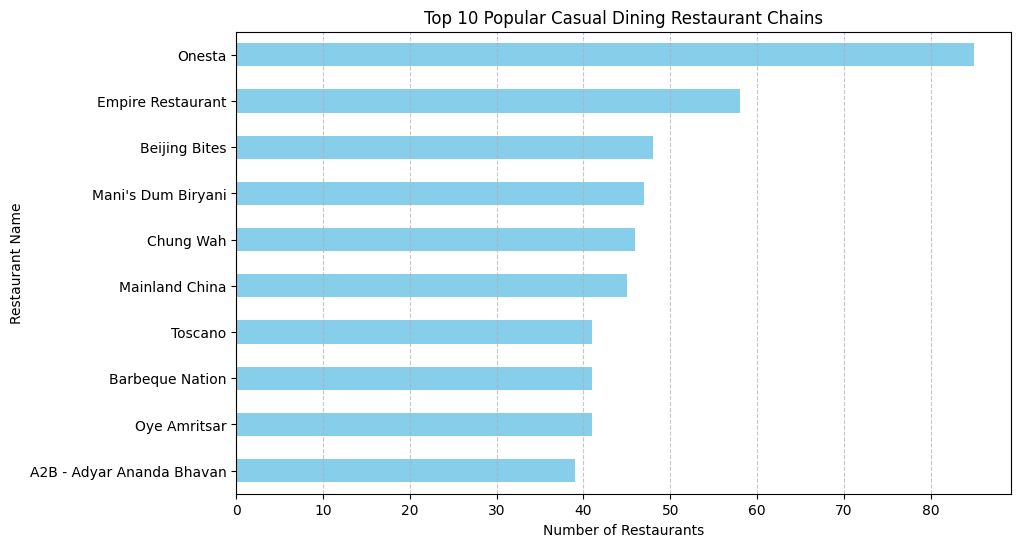

In [30]:
# Filter only Casual Dining
casual_df = df[df['rest_type'].str.contains('Casual Dining', na=False)]

# Count restaurants by name
popular_chains = casual_df['name'].value_counts().head(10)  # Top 10

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
popular_chains.sort_values().plot(kind='barh', color='skyblue')

plt.xlabel('Number of Restaurants')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Popular Casual Dining Restaurant Chains')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# top quick bites 

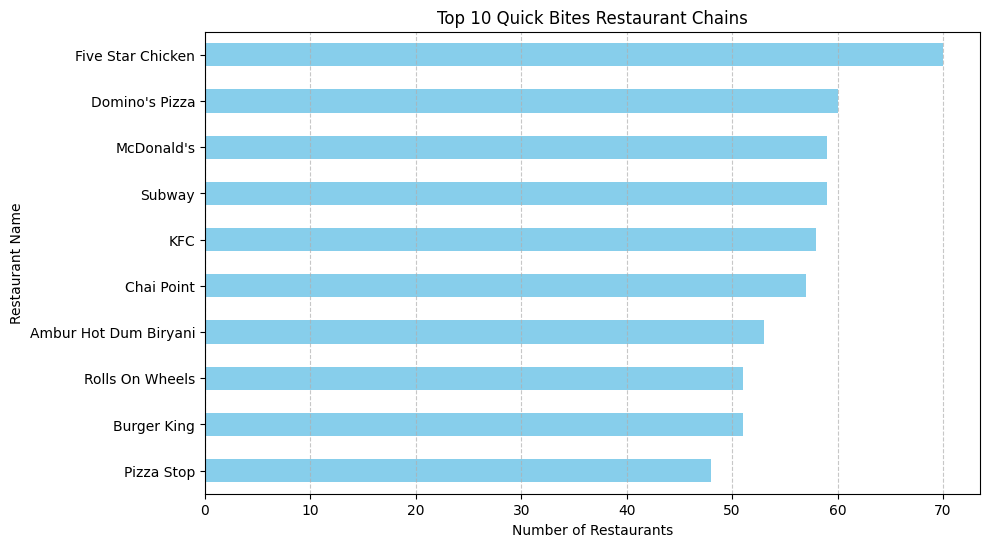

In [31]:


# Filter Quick Bites only
quick_bites_df = df[df['rest_type'].str.contains('Quick Bites', na=False)]

# Count by restaurant name
popular_quick_bites = quick_bites_df['name'].value_counts().head(10)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
popular_quick_bites.sort_values().plot(kind='barh', color='skyblue')

plt.xlabel('Number of Restaurants')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Quick Bites Restaurant Chains')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


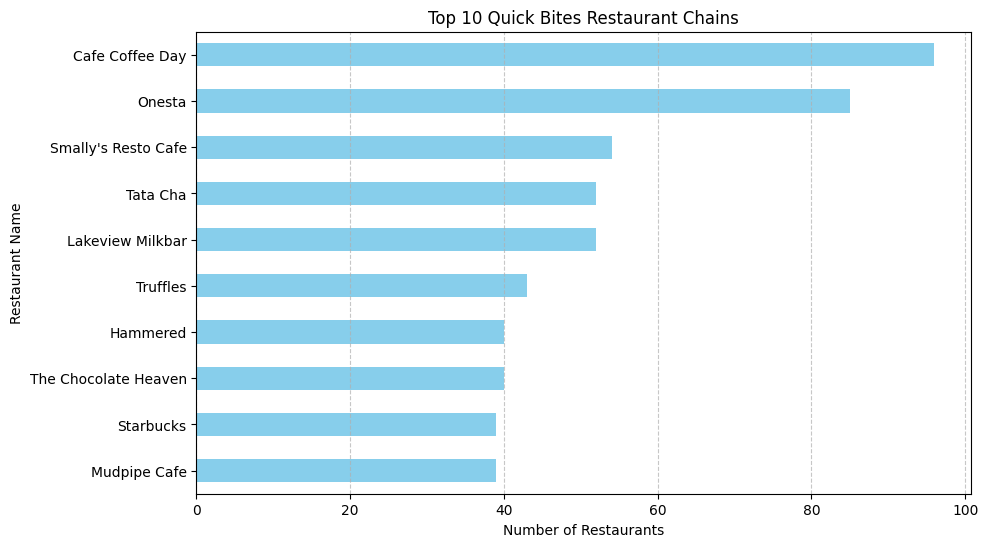

In [32]:


# Filter Quick Bites only
quick_bites_df = df[df['rest_type'].str.contains('Cafe', na=False)]

# Count by restaurant name
popular_quick_bites = quick_bites_df['name'].value_counts().head(10)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
popular_quick_bites.sort_values().plot(kind='barh', color='skyblue')

plt.xlabel('Number of Restaurants')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Quick Bites Restaurant Chains')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



<Figure size 1000x600 with 0 Axes>

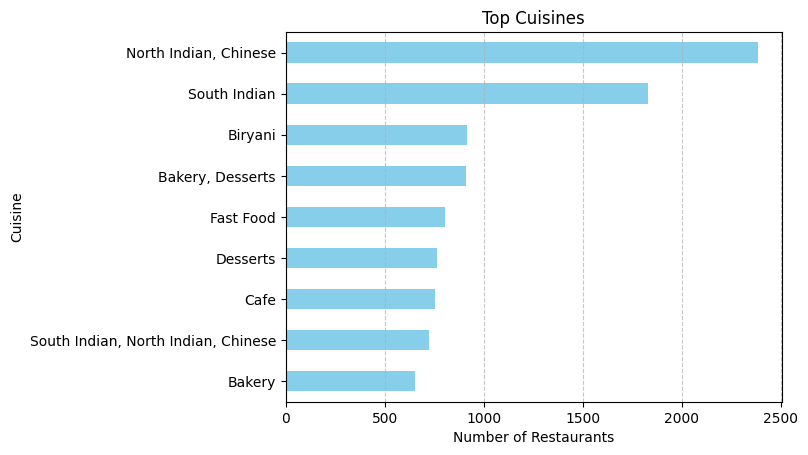

In [33]:
import matplotlib.pyplot as plt

# Count cuisines and take top 10 (excluding the first one if you want [1:10])
cuiseness = df["cuisines"].value_counts().reset_index()
cuiseness.columns = ["Cuisine", "Count"]

# Slice 1:10 just like you mentioned
top_cuiseness = cuiseness[1:10]

# Plot in the same style as before
plt.figure(figsize=(10, 6))
top_cuiseness.sort_values(by="Count").plot(
    kind="barh", 
    x="Cuisine", 
    y="Count", 
    color="skyblue",
    legend=False
)

plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.title("Top Cuisines")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [34]:
# Filter only North Indian restaurants
north_rest = df[df['cuisines'].str.contains('North Indian', na=False)]

# Count North Indian restaurants per location
north_counts = north_rest["location"].value_counts().reset_index()
north_counts.columns = ["Name", "count"]

# Merge with the locations DataFrame to get coordinates
north_locations = north_counts.merge(locations, on="Name", how="inner")

# Extract lat/lon from geo_loc for North Indian locations
north_locations["lat"] = north_locations["geo_loc"].apply(lambda x: x[0])
north_locations["lon"] = north_locations["geo_loc"].apply(lambda x: x[1])

north_locations.tail()


,Name,count,geo_loc,lat,lon
78,Old Madras Road,7,"(12.9956832, 77.666289)",12.995683,77.666289
79,Nagarbhavi,5,"(12.9651215, 77.5090098)",12.965122,77.509010
80,Hebbal,4,"(13.0382184, 77.5919)",13.038218,77.591900
81,Jakkur,3,"(13.0784743, 77.6068938)",13.078474,77.606894
82,Peenya,1,"(13.0329814, 77.5331801)",13.032981,77.533180


In [35]:
import folium
from folium.plugins import HeatMap

# Create base map centered on Bangalore
m1 = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

# Prepare data for HeatMap: [[lat, lon, weight], ...]
heat_data = north_locations[['lat', 'lon', 'count']].values.tolist()

# Add heat map layer
HeatMap(heat_data, radius=15, blur=10, max_zoom=1).add_to(m1)

# Save to HTML

# If you want to display directly in Jupyter
m1

# heatmap of south indian restaurants

In [36]:
# Filter only South Indian restaurants
south_rest = df[df['cuisines'].str.contains('South Indian', na=False)]

# Count South Indian restaurants per location
south_counts = south_rest["location"].value_counts().reset_index()
south_counts.columns = ["Name", "count"]

# Merge with the locations DataFrame to get coordinates
south_locations = south_counts.merge(locations, on="Name", how="inner")

# Extract lat/lon from geo_loc for South Indian locations
south_locations["lat"] = south_locations["geo_loc"].apply(lambda x: x[0])
south_locations["lon"] = south_locations["geo_loc"].apply(lambda x: x[1])
south_locations.tail()


,Name,count,geo_loc,lat,lon
76,Uttarahalli,4,"(12.9055682, 77.5455438)",12.905568,77.545544
77,Yelahanka,4,"(13.1006982, 77.5963454)",13.100698,77.596345
78,Jakkur,3,"(13.0784743, 77.6068938)",13.078474,77.606894
79,Old Madras Road,2,"(12.9956832, 77.666289)",12.995683,77.666289
80,Hebbal,1,"(13.0382184, 77.5919)",13.038218,77.591900


In [37]:
import folium
from folium.plugins import HeatMap

# Create base map centered on Bangalore
m = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

# Prepare data for HeatMap: [[lat, lon, weight], ...]
heat_data = south_locations[['lat', 'lon', 'count']].values.tolist()

# Add heat map layer
HeatMap(heat_data, radius=15, blur=10, max_zoom=1).add_to(m)

# Save to HTML

# If you want to display directly in Jupyter
m



In [38]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


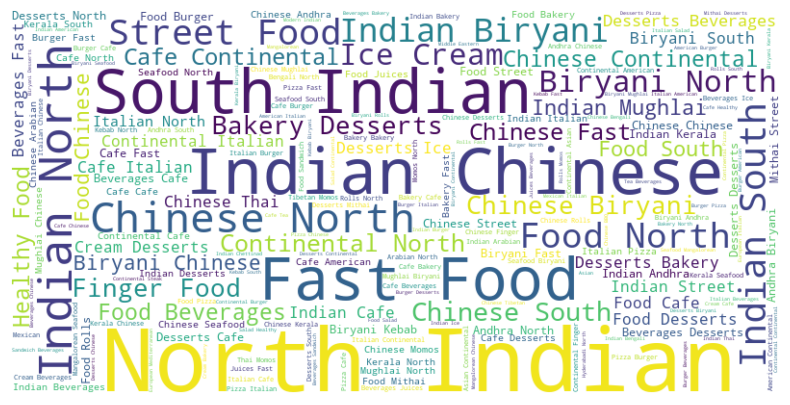

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all cuisines into one big string
text = ','.join(df['cuisines'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


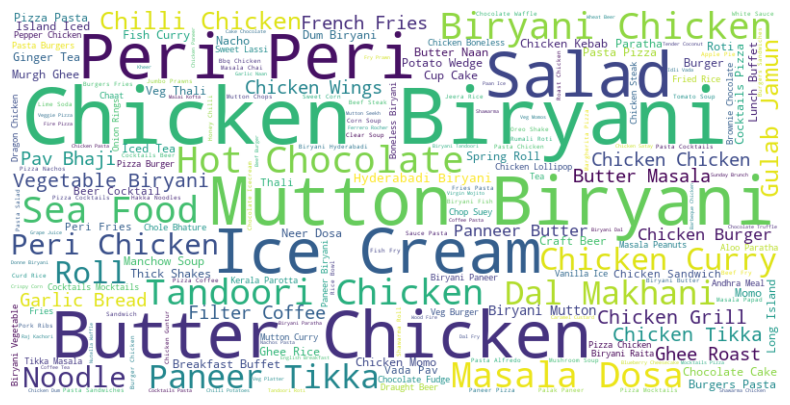

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all cuisines into one big string
text = ','.join(df['dish_liked'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Ratings

In [86]:
import ast
import re
from tqdm import tqdm
import pandas as pd

all_ratings = []

for name, ratings_str in tqdm(zip(df['name'], df['reviews_list']), total=len(df)):
    try:
        ratings = ast.literal_eval(ratings_str)
    except (ValueError, SyntaxError):
        continue  # skip invalid entries
    for score, doc in ratings:
        if score:
            score = score.replace("Rated", "").strip()
            doc = doc.replace("RATED", "").strip()
            try:
                score = float(score)
            except ValueError:
                continue  # skip invalid score
            all_ratings.append([name, score, doc])

rating_df = pd.DataFrame(all_ratings, columns=['name', 'rating', 'review'])
rating_df['review'] = rating_df['review'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', "", x))


100%|██████████████████████████████████████████████████████████████████████████| 51717/51717 [00:34<00:00, 1487.57it/s]


In [87]:
avg_ratings = rating_df.groupby('name')['rating'].mean().reset_index().sort_values(by='rating', ascending=False)
print(avg_ratings.head())


                    name  rating
4726  Priyanka's Kitchen     5.0
7037   iSpice Resto Cafe     5.0
7033          de Ranthal     5.0
3851   Meraki Patisserie     5.0
6982           Yummy Pot     5.0


In [88]:
review_counts = rating_df['name'].value_counts().reset_index()
review_counts.columns = ['name', 'review_count']
print(review_counts.head())


            name  review_count
0       Hammered         11894
1  Mast Kalandar          9147
2       Truffles          8783
3         Onesta          7656
4   Crawl Street          6498


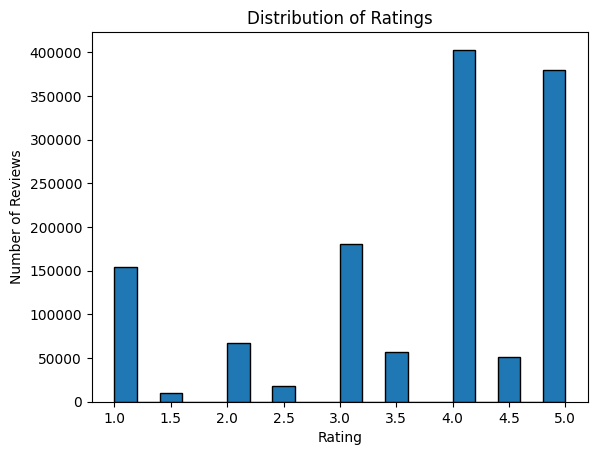

In [89]:
import matplotlib.pyplot as plt
plt.hist(rating_df['rating'], bins=20, edgecolor='k')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings')
plt.show()


# World Cloud for Positive Reviews

In [96]:
from textblob import TextBlob

rating_df['sentiment'] = rating_df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)


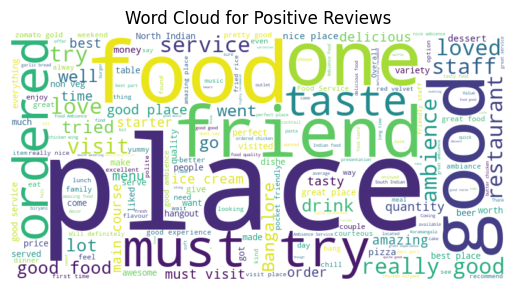

In [93]:
from wordcloud import WordCloud

positive_reviews = ' '.join(rating_df[rating_df['rating'] >= 4]['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()
